# 5. Printing
http://docs.sympy.org/latest/tutorial/printing.html

## Printers
There are several printers available in SymPy. The most common ones are

- str
- srepr
- ASCII pretty printer
- Unicode pretty printer
- LaTeX
- MathML
- Dot

In addition to these, there are also “printers” that can output SymPy objects to code, such as C, Fortran, Javascript, Theano, and Python. These are not discussed in this tutorial.

## Setting up Pretty Printing
If all you want is the best pretty printing, use the ***init_printing()*** function. This will automatically enable the best printer available in your environment.

In [18]:
from sympy import *
init_printing()

If you plan to work in an interactive calculator-type session, the ***init_session()*** function will automatically import everything in SymPy, create some common Symbols, setup plotting, and run ***init_printing()***.

In [19]:
init_session()

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In any case, this is what will happen:

- In the IPython QTConsole, if $\LaTeX$ is installed, it will enable a printer that uses $\LaTeX$.  
- If $\LaTeX$ is not installed, but Matplotlib is installed, it will use the Matplotlib rendering engine. If Matplotlib is not installed, it uses the Unicode pretty printer.
- In the IPython notebook, it will use **MathJax** to render  $\LaTeX$.
- In an IPython console session, or a regular Python session, it will use the Unicode pretty printer if the terminal supports Unicode.
- In a terminal that does not support Unicode, the ASCII pretty printer is used.

To explicitly not use  $\LaTeX$, pass ***use_latex=False*** to ***init_printing()*** or ***init_session()***. To explicitly not use Unicode, pass ***use_unicode=False***.

## Printing Functions¶
In addition to automatic printing, you can explicitly use any one of the printers by calling the appropriate function.

### str
To get a string form of an expression, use str(expr). This is also the form that is produced by print(expr). String forms are designed to be easy to read, but in a form that is correct Python syntax so that it can be copied and pasted. The ***str() form of an expression will usually look exactly the same as the expression as you would enter it***.

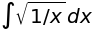

In [20]:
Integral(sqrt(1/x), x)

In [21]:
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

In [22]:
print(Integral(sqrt(1/x), x))

Integral(sqrt(1/x), x)


### srepr
The srepr form of an expression is designed to show ***the exact form of an expression***. It will be discussed more in the Advanced Expression Manipulation section. To get it, use srepr() [1].

In [23]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

The srepr form is mostly useful for understanding ***how an expression is built internally***.

## ASCII Pretty Printer
The ASCII pretty printer is accessed from ***pprint()***. If the terminal does not support Unicode, the ASCII printer is used by default. Otherwise, you must pass ***use_unicode=False***.

In [24]:
pprint(Integral(sqrt(1/x), x), use_unicode=False) 

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


pprint() prints the output to the screen. If you want the string form, use ***pretty()***.

In [25]:
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [26]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


## Unicode Pretty Printer
The Unicode pretty printer is also accessed from pprint() and pretty(). If the terminal supports Unicode, it is used automatically. If pprint() is not able to detect that the terminal supports unicode, you can pass use_unicode=True to force it to use Unicode.

In [27]:
pprint(Integral(sqrt(1/x), x), use_unicode=True) 

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


## LATEXLATEX
To get the LATEXLATEX form of an expression, use ***latex()***.

In [28]:
 print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


The latex() function has many options to change the formatting of different things. See [its documentation](http://docs.sympy.org/latest/modules/printing.html#sympy.printing.latex.latex) for more details.

## MathML
There is also a printer to MathML, called ***print_mathml()**. It must be imported from sympy.printing.mathml.

In [29]:
from sympy.printing.mathml import print_mathml, mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



***print_mathml()*** prints the output. If you want the string, use the function ***mathml()***.

In [30]:
mathml(Integral(sqrt(1/x), x))

'<apply><int/><bvar><ci>x</ci></bvar><apply><root/><apply><power/><ci>x</ci><cn>-1</cn></apply></apply></apply>'

## Dot
The ***dotprint()*** function in ***sympy.printing.dot*** prints output to dot format, which can be rendered with ***Graphviz***. See the Advanced Expression Manipulation section for some examples of the output of this printer.


### Footnotes

[1]	SymPy does not use the Python builtin repr() function for repr printing, because in Python str(list) calls repr() on the elements of the list, and some SymPy functions return lists (such as solve()). Since srepr() is so verbose, it is unlikely that anyone would want it called by default on the output of solve().